<ipython-input-1-d1045395b495>:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  spam_plot = fig.add_subplot()


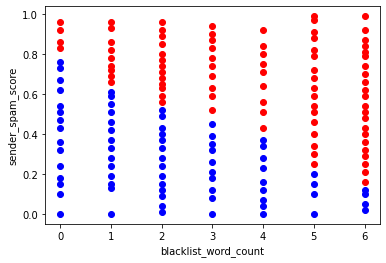

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import get_file

csv_file = get_file('spam-email-1.csv',
                    'https://raw.githubusercontent.com/BlackLight/mlbook-code/master/datasets/spam-email-1.csv')

with open(csv_file) as f:
    data = pd.read_csv(f)

# Split spam and non-spam rows
spam = data[data['is_spam'] == 1]
non_spam = data[data['is_spam'] == 0]

columns = data.keys()
fig = plt.figure()

# Plot the non-spam data points in blue
non_spam_plot = fig.add_subplot()
non_spam_plot.set_xlabel(columns[0])
non_spam_plot.set_ylabel(columns[1])
non_spam_plot.scatter(non_spam[columns[0]], non_spam[columns[1]], c='b')

# Plot the spam data points in red
spam_plot = fig.add_subplot()
spam_plot.scatter(spam[columns[0]], spam[columns[1]], c='r')
# fig.savefig('/home/blacklight/logistic-regression-1.png')

<ipython-input-65-4781ce24e3c0>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  negative_plot = fig.add_subplot()


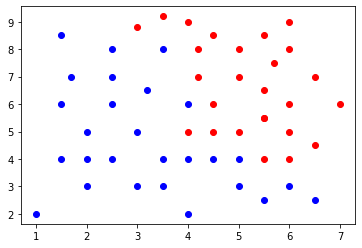

In [65]:
fig = plt.figure()

# Plot the non-spam data points in blue
positive_plot = fig.add_subplot()
positive_plot.scatter(
    [5.0, 6.0, 7.0, 5.0, 5.5, 6.0, 6.5, 6.0, 6.5, 6.0, 6.0, 5.5, 5.0, 4.5, 5.5, 4.0, 4.2, 5.5, 5.5, 5.7, 4.5, 4.0, 3.5, 3.0, 4.5, 4.2],
    [8.0, 9.0, 6.0, 7.0, 6.5, 8.0, 7.0, 6.0, 4.5, 5.0, 4.0, 5.5, 5.0, 6.0, 8.5, 5.0, 7.0, 5.5, 4.0, 7.5, 8.5, 9.0, 9.2, 8.8, 5.0, 8.0],
    c='r')

# Plot the spam data points in red
negative_plot = fig.add_subplot()
negative_plot.scatter(
    [1.0, 2.0, 2.0, 3.0, 2.0, 1.5, 1.5, 2.5, 3.0, 2.5, 3.5, 4.0, 4.0, 4.5, 3.5, 3.5, 3.2, 5.0, 6.0, 5.5, 6.5, 1.5, 2.5, 1.7, 2.5, 4.0, 5.0],
    [2.0, 3.0, 4.0, 5.0, 5.0, 6.0, 4.0, 7.0, 3.0, 8.0, 3.0, 2.0, 6.0, 4.0, 4.0, 8.0, 6.5, 3.0, 3.0, 2.5, 2.5, 8.5, 4.0, 7.0, 6.0, 4.0, 4.0],
    c='b')

fig.savefig('/home/blacklight/non-linear-boundary-2.png')

In [ ]:
dataset_stats = data.describe()
dataset_stats

In [3]:
def normalize(x, stats):
    return (x - stats['mean']) / stats['std']

def denormalize(x, stats):
    return stats['std'] * x + stats['mean']

In [62]:
import math
import numpy as np

def h(theta):
    """
    Return the hypothesis function associated to
    the parameters theta
    """

    def _model(x):
        """
        Return the hypothesis for an input vector x
        given the parameters theta. Note that we use
        numpy.dot here as a more compact way to
        represent the scalar product theta*x
        """
        return 1./(1 + math.exp(-np.dot(theta, x)))

    return _model

def gradient_descent(x, y, theta, alpha):
    """
    Perform the gradient descent.

    :param x: Array of input vectors
    :param y: Output vector
    :param theta: Values for theta
    :param alpha: Learning rate
    """

    # Number of samples
    m = len(x)
    # Number of features+1
    n = len(theta)
    new_theta = np.zeros(n)

    # Perform the gradient descent on theta
    for j in range(n):
        for i in range(m):
            new_theta[j] += (h(theta)(x[i]) - y[i]) * x[i][j]
        new_theta[j] = theta[j] - (alpha/m) * new_theta[j]

    return new_theta

def train(x, y, epochs, alpha=0.001):
    """
    Train a model on the specified dataset

    :param x: Array of normalized input vectors
    :param y: Normalized output vector
    :param epochs: Number of training iterations
    :param alpha: Learning rate
    """
    # Set x0=1
    new_x = np.ones((x.shape[0], x.shape[1]+1))
    new_x[:, 1:] = x
    x = new_x

    # Initialize theta randomly
    theta = np.random.randint(low=0, high=10, size=len(x[0]))

    # Perform the gradient descent <epochs> times
    for i in range(epochs):
        theta = gradient_descent(x, y, theta, alpha)

    # Return the hypothesis function associated to
    # the parameters theta
    return h(theta)

def predict(x, stats, model, boolean=True):
    """
    Make a prediction given a model and an input vector
    """

    # Normalize the values
    x = normalize(x, stats).values
    # Set x0=1
    x = np.insert(x, 0, 1.)

    ret = model(x)
    if not boolean:
        return ret
    return ret >= 0.5

In [107]:
def evaluate(x, y, stats, model):
    """
    Evaluate the accuracy of a model.

    :param x: Array of input vectors
    :param y: Vector of expected outputs
    :param stats: Input normalization stats
    :param model: Hypothesis function
    """
    n_samples = len(x)
    ok_samples = 0

    for i, row in x.iterrows():
        expected = y[i]
        predicted = predict(row, stats, model)
        if expected == predicted:
            ok_samples += 1

    return ok_samples/n_samples

In [117]:
columns = dataset_stats.keys()
# x contains the input features (first two columns)
inputs = data.loc[:, columns[:2]]
# y contains the output features (last column)
outputs = data.loc[:, columns[2]]

x_stats = inputs.describe().transpose()
y_stats = outputs.describe().transpose()

norm_x = normalize(inputs, x_stats)
norm_y = normalize(outputs, y_stats)

In [118]:
spam_classifier = train(norm_x, norm_y, 100)
spam_classifier

KeyError: 0

In [103]:
# Get the first and last input rows
x_data = inputs.iloc[[0, -1]].values
# predict(x_data[0], x_stats, spam_classifier, boolean=False)

# Get the associated numeric predictions
y_data = [predict(x, x_stats, spam_classifier, boolean=False) for x in x_data]
y_data

[2.8004833965621933e-07, 0.9999999999789702]

In [108]:
evaluate(inputs, outputs, x_stats, spam_classifier)

0.8636363636363636

In [153]:
from tensorflow.keras.experimental import LinearModel

columns = dataset_stats.keys()
inputs = data.loc[:, columns[:2]]
outputs = data.loc[:, columns[2:]]

x_stats = inputs.describe().transpose()
norm_x = normalize(inputs, x_stats)

model = LinearModel(2, activation='sigmoid', dtype='float32')
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy',
              metrics=['accuracy', 'sparse_categorical_crossentropy'])
history = model.fit(norm_x, outputs, epochs=700, verbose=0)

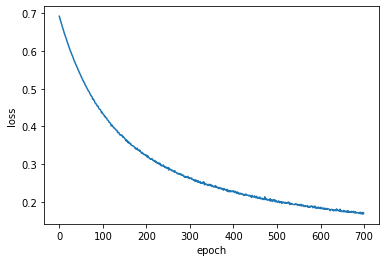

In [155]:
epochs = history.epoch
loss = history.history['loss']

fig = plt.figure()
plot = fig.add_subplot()
plot.set_xlabel('epoch')
plot.set_ylabel('loss')
plot.plot(epochs, loss)
